<a href="https://colab.research.google.com/github/krivonosanna/Diploma/blob/master/tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import math as m

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Теория вероятностей

### 1.1 На столе лежит 250 монет, среди которых 1 фальшивая. На обеих сторонах фальшивой монеты орел. Со стола случайным образом выбирается монета и подбрасывается, какова вероятность что выбранная монета фальшивая, если выпал орел?

Решение:

$F$ - фальшивая монета, $T$ - нет;

$O$ - орел, $R$ - решка.

$P\left(F\middle|O\right) = \frac{P(F, O)}{P(O)} = \frac{\frac{1}{250}}{\frac{249}{250} * \frac{1}{2} + \frac{1}{250}} = \frac{2}{251}$

### 1.2 Мастер работает по графику 2 через 2. В случайный день вы понимаете, что вам нужно к нему попасть либо сегодня, либо завтра. Какова вероятность что это удастся сделать?

Есть четыре "типа" дня:

* первый рабочий день врача
* второй рабочий день врача
* первый выходной врача
* второй выходной врача

Пациент не сможет прийти на прием сегодня или завтра, только если это день первого выходного врача. В остальные три дня сможет.
Ответ: $\frac{3}{4}$

## 2. Базовый python

### 2.1 Выполнить преобразование над элементами массива x -> 2 * x + 1

In [ ]:
a = [3, 1, 5, 7, 2, 5, 3, 9]

При большом размере массива будет работать быстрее.

In [ ]:
a = 2 * np.array(a) + 1
a

array([ 7,  3, 11, 15,  5, 11,  7, 19])

Если не хотим копировать массив:

In [ ]:
a = [3, 1, 5, 7, 2, 5, 3, 9]
for i in range(len(a)):
  a[i] = 2 * a[i] + 1

a

[7, 3, 11, 15, 5, 11, 7, 19]

### 2.2 Поставить в соответствие столбцу value столбец value_tr по правилу:
Да -> 1;
Нет -> -1;
nan -> 0;

In [ ]:
df = pd.read_excel('task2.xlsx')

In [ ]:
df.head()

,id,value
0,0,Нет
1,1,Да
2,2,NaN
3,3,Да
4,4,Да


In [ ]:
df['value_tr'] = 0
df.loc[df['value'] == 'Да', 'value_tr'] = 1
df.loc[df['value'] == 'Нет', 'value_tr'] = -1
df.head()

,id,value,value_tr
0,0,Нет,-1
1,1,Да,1
2,2,NaN,0
3,3,Да,1
4,4,Да,1


### 2.3 Создать список с уникальными значениями из a

In [ ]:
a = [1, 4, 2, 1, 1, 7, 4]

In [ ]:
list(np.unique(a))

[1, 2, 4, 7]

In [ ]:
list(set(a))

[1, 2, 4, 7]

### 2.4 Поставить в соответствие диапазону значений в value столбец value_tr по правилу:
(-inf; 0.15] -> 'A';
(0.15; 0.8] -> 'B';
(0.8; inf) -> 'C';

In [ ]:
df = pd.read_excel('task4.xlsx')

In [ ]:
df.head()

,id,value
0,0,0.323078
1,1,0.966451
2,2,0.132535
3,3,0.166313
4,4,0.589322


In [ ]:
df['value_tr'] = 'B'
df.loc[df['value'] <= 0.15, 'value_tr'] = 'A'
df.loc[df['value'] > 0.8, 'value_tr'] = 'C'

In [ ]:
df.head()

,id,value,value_tr
0,0,0.323078,B
1,1,0.966451,C
2,2,0.132535,A
3,3,0.166313,B
4,4,0.589322,B


### 2.5 Для каждого id найти второй максимум по value, если значений меньше 2-х, то вывести nan

In [ ]:
df = pd.read_excel('task5.xlsx')

In [ ]:
def get_second_max(col):
    if len(col) < 2:
      return np.nan
    second_largest = np.partition(col, -2)[-2]
    return second_largest

df_second_max = df.groupby('id')['value'].apply(get_second_max).reset_index().rename(columns={'value':'second_max'})
df_second_max

,id,second_max
0,0,99303
1,1,97971
2,2,98898
3,3,97780
4,4,99756
...,...,...
95,95,91706
96,96,97100
97,97,98393
98,98,97475


### 2.6 Определим признак активного клиента в некоторый месяц, как наличие хотя бы одной транзакции, в противном случае будем считать его неактивным. Будем считать клиента хорошим, если он активен непрерыно в каждый месяц с момента первой активности. Требуется вывести id всех хороших клиентов.

In [ ]:
df = pd.read_excel('task6.xlsx')

In [ ]:
df.head()

,ind,date,client_id,sum
0,0,2022-09-01,71,55932
1,1,2022-09-01,435,36372
2,2,2022-05-01,665,37711
3,3,2022-04-01,391,21178
4,4,2022-11-01,624,81671


In [ ]:
# предполагается, что все операции происходят в течение одного года
def is_active_client(col):
  return np.all(np.diff(sorted(col.dt.month)) <= 1)

In [ ]:
df_group = df.groupby('client_id')['date'].apply(is_active_client).reset_index()
df_group[df_group.date].drop('date', axis=1)

,client_id
27,27
65,65
73,73
95,95
130,130
180,180
262,262
281,281
314,314
378,378


## 3. Python ML

### 3.1 Постройте модель логистической регрессии по оценке вероятности оттока на основе данных ***telecom_churn.csv*** (задача классификации - 2 класса). Оцените качество полученной модели. (целевая переменная churn)

In [ ]:
df = pd.read_csv('telecom_churn.csv')

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.columns, len(df.columns)

(Index(['state', 'account length', 'area code', 'international plan',
        'voice mail plan', 'number vmail messages', 'total day minutes',
        'total day calls', 'total day charge', 'total eve minutes',
        'total eve calls', 'total eve charge', 'total night minutes',
        'total night calls', 'total night charge', 'total intl minutes',
        'total intl calls', 'total intl charge', 'customer service calls',
        'churn'],
       dtype='object'),
 20)

In [ ]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
df = df.drop(['phone number'], axis=1)

In [ ]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

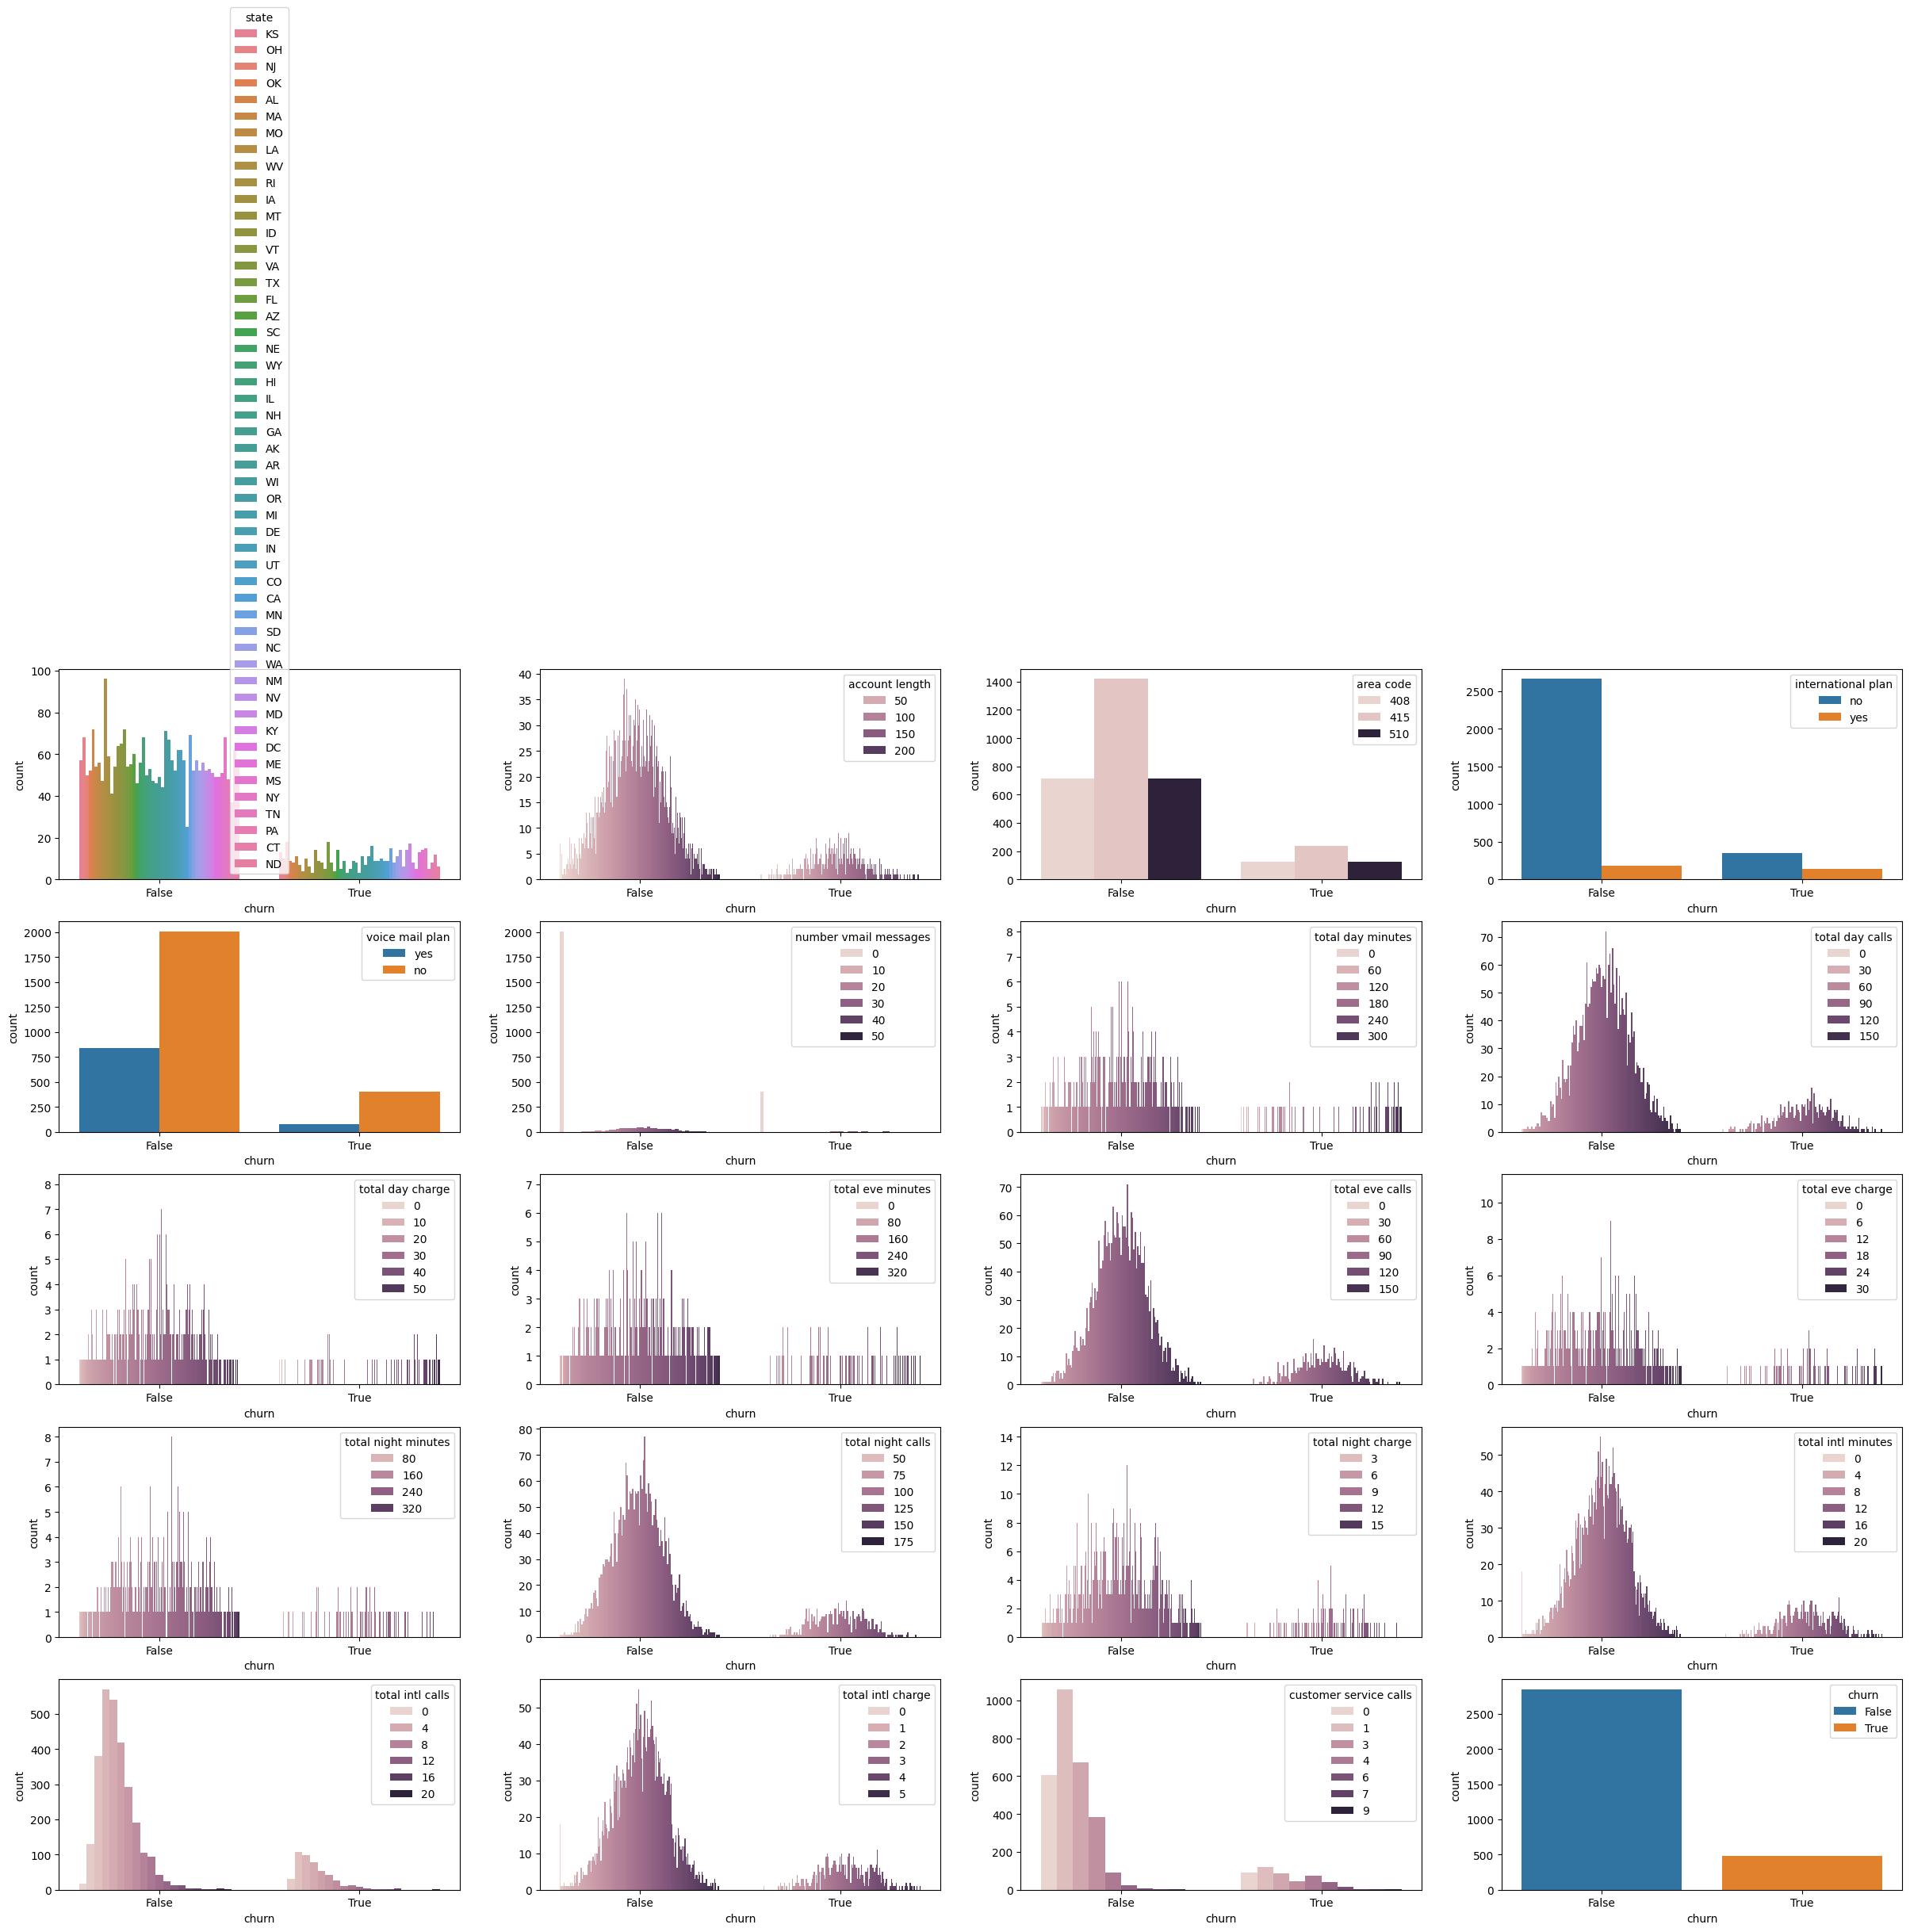

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(30,20))
ax = ax.ravel()

name = df.columns
for idx in range(len(df.columns)):
    sns.countplot(x='churn', data=df, hue=name[idx], ax = ax[idx])

Есть дисбаланс классов.
Признак state явно не информативен, удалим его. Закодируем категориальные признаки.

In [ ]:
df = df.drop(['state'], axis=1)

In [ ]:
df['account length'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [ ]:
df['area code'].unique()

array([415, 408, 510])

In [ ]:
df['area code_1'] = (df['area code'] == 415) * 1
df['area code_2'] = (df['area code'] == 408) * 1

In [ ]:
df = df.drop(['area code'], axis = 1)

In [ ]:
df['total intl calls'].unique()

array([ 3,  5,  7,  6,  4,  2,  9, 19,  1, 10, 15,  8, 11,  0, 12, 13, 18,
       14, 16, 20, 17])

In [ ]:
df['customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
df = df.replace(['no', 'yes', True, False], [0, 1, 1, 0])

In [ ]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_1,area code_2
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [ ]:
y = df['churn']
X = df.drop(['churn'], axis=1)

In [ ]:
X.shape

(3333, 19)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
(y_train == 1).sum(), (y_train == 0).sum(), (y_test == 1).sum(), (y_test == 0).sum()

(324, 1909, 159, 941)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

Обучим модель логистической регрессии.

Мы оцениваем вероятность оттока. В качестве критерия качества можно использовать метрику roc-auc и recall.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
prob = clf1.predict_proba(X_test)[:, 1]
y_pred = clf1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, prob)

0.814375179622909

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       941
           1       0.55      0.24      0.33       159

    accuracy                           0.86      1100
   macro avg       0.72      0.60      0.63      1100
weighted avg       0.83      0.86      0.84      1100



Попробуем использовать взвешивание классов, встроенное в LogisticRegression

In [ ]:
clf2 = LogisticRegression(class_weight='balanced')
clf2.fit(X_train, y_train)
prob = clf2.predict_proba(X_test)[:, 1]
y_pred = clf2.predict(X_test)

In [ ]:
roc_auc_score(y_test, prob)

0.8187596495097548

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       941
           1       0.35      0.74      0.47       159

    accuracy                           0.76      1100
   macro avg       0.65      0.75      0.66      1100
weighted avg       0.86      0.76      0.79      1100



Полнота малого класса выросла, но точность и accuracy упали. Так как предсказыаем отток, хотелось бы  предсказывать как можно больше действительно верный положительный класс(recall), нежели точнее(precision).

In [ ]:
clf2.coef_

array([[ 0.07752129,  0.69207239, -0.87722112,  0.52922351,  0.31615341,
         0.02954051,  0.30808283,  0.15288808,  0.0957851 ,  0.14966062,
         0.06916773, -0.00950008,  0.07152107,  0.03686905, -0.29593816,
         0.16363685,  0.78193973,  0.04521875,  0.0483391 ]])

Удалим нерелевантные признаки

In [ ]:
df1 = df.drop(['account length', 'area code_1', 'area code_2'], axis=1)

In [ ]:
y = df1['churn']
X = df1.drop(['churn'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [ ]:
clf3 = LogisticRegression(class_weight='balanced')
clf3.fit(X_train, y_train)
prob = clf3.predict_proba(X_test)[:, 1]
y_pred = clf3.predict(X_test)

In [ ]:
roc_auc_score(y_test, prob)

0.8203236219998797

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       941
           1       0.35      0.75      0.48       159

    accuracy                           0.76      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.76      0.79      1100



In [ ]:
c = np.logspace(-3, 3, 15)
c

array([1.00000000e-03, 2.68269580e-03, 7.19685673e-03, 1.93069773e-02,
       5.17947468e-02, 1.38949549e-01, 3.72759372e-01, 1.00000000e+00,
       2.68269580e+00, 7.19685673e+00, 1.93069773e+01, 5.17947468e+01,
       1.38949549e+02, 3.72759372e+02, 1.00000000e+03])

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
roc_auc = []
recall = []
for i in c:
  clf = LogisticRegression(class_weight='balanced', C = i)
  clf.fit(X_train, y_train)
  prob = clf.predict_proba(X_test)[:, 1]
  y_pred = clf.predict(X_test)
  roc_auc.append(roc_auc_score(y_test, prob))
  recall.append(recall_score(y_test, y_pred))

In [ ]:
np.argmax(roc_auc)

0

In [ ]:
np.argmax(recall)

1

In [ ]:
clf4 = LogisticRegression(class_weight='balanced', C = c[0])
clf4.fit(X_train, y_train)
prob = clf4.predict_proba(X_test)[:, 1]
y_pred = clf4.predict(X_test)

In [ ]:
roc_auc_score(y_test, prob)

0.8243070732995141

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       941
           1       0.34      0.77      0.47       159

    accuracy                           0.75      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.75      0.79      1100



Попробуем сбалансиловать классы

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
clf5 = LogisticRegression(C = c[0])
clf5.fit(X_resampled, y_resampled)
prob = clf5.predict_proba(X_test)[:, 1]
y_pred = clf5.predict(X_test)

In [ ]:
roc_auc_score(y_test, prob)

0.8217071361257595

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       941
           1       0.35      0.77      0.48       159

    accuracy                           0.76      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.76      0.79      1100



Лучше не стало)

In [ ]:
#лучшая модель

In [ ]:
clf4 = LogisticRegression(class_weight='balanced', C = c[0])
clf4.fit(X_train, y_train)
prob = clf4.predict_proba(X_test)[:, 1]
y_pred = clf4.predict(X_test)

In [ ]:
roc_auc_score(y_test, prob)

0.8243070732995141

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       941
           1       0.34      0.77      0.47       159

    accuracy                           0.75      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.75      0.79      1100



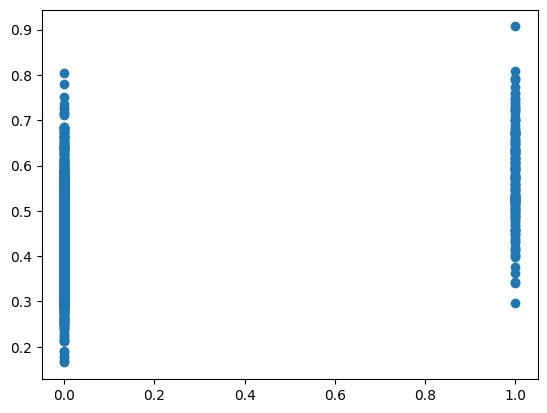

In [ ]:
plt.scatter(y_test, prob)